In [41]:
#importing library
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the dataset
df_2c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_2C_weka.csv')
#showing the dataset
df_2c

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [4]:
df_3c=pd.read_csv('../input/biomechanical-features-of-orthopedic-patients/column_3C_weka.csv')
#showing the dataset
df_3c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


In [7]:
print(df_2c.info())
print(df_3c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosi

In [8]:
#Preprocessing
y_2c=df_2c['class'].copy()
y_3c=df_3c['class'].copy()

In [9]:
x=df_2c.drop('class',axis=1).copy()

In [10]:
y_2c.unique()

array(['Abnormal', 'Normal'], dtype=object)

In [11]:
y_3c.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)

In [12]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [13]:
pd.DataFrame(x)

,0,1,2,3,4,5
0,0.147086,0.501369,-0.665177,-0.184950,-1.447647,-0.708059
1,-1.245864,-0.748769,-1.453001,-1.041521,-0.264385,-0.579556
2,0.484370,0.467932,-0.099262,0.273083,-0.897686,-0.795421
3,0.511390,0.711562,-0.411339,0.126128,-1.207303,-0.402288
4,-0.626648,-0.789693,-1.274745,-0.215876,-0.733455,-0.490106
...,...,...,...,...,...,...
305,-0.731786,-0.392921,-0.860010,-0.646718,-0.035469,-0.814491
306,-0.381197,0.318116,-1.225991,-0.726682,-0.267362,-0.712503
307,0.055201,0.515618,-0.310977,-0.313564,0.582893,-0.773488
308,-0.885823,-0.885660,-0.558613,-0.477128,0.047021,-0.695548


In [15]:
x_train,x_test,y_2c_train,y_2c_test,y_3c_train,y_3c_test=train_test_split(x,y_2c,y_3c,train_size=0.7,random_state=123)


In [16]:
print(x_train.shape)
print(x_test.shape)
print(y_2c_test.shape)
print(y_2c_train.shape)
print(y_3c_test.shape)
print(y_3c_train.shape)

(217, 6)
(93, 6)
(93,)
(217,)
(93,)
(217,)


# Training


In [19]:
#training the model
model_2c=LogisticRegressionCV()
model_2c.fit(x_train,y_2c_train)




model_3c=LogisticRegressionCV()
model_3c.fit(x_train,y_3c_train)


LogisticRegressionCV()

In [20]:
model_2c.predict(x_train)

array(['Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Normal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Normal', 'Abnormal', 'Normal', 'Normal', 'Abnormal',
       'Normal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal', 'Normal',
       'Normal', 'Abnormal', 'Normal', 'Normal', 'Normal', 'Abnormal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
       'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal',
       'Normal', 'Normal', 'Normal', 'Abnormal', 'Abnormal', 'Normal',
      

In [21]:
#predicting the unseen data
model_3c.predict(x_train)

array(['Spondylolisthesis', 'Spondylolisthesis', 'Normal', 'Normal',
       'Hernia', 'Normal', 'Spondylolisthesis', 'Normal', 'Normal',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Hernia', 'Hernia', 'Hernia', 'Hernia', 'Spondylolisthesis',
       'Hernia', 'Spondylolisthesis', 'Normal', 'Normal',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis', 'Hernia',
       'Hernia', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Spondylol

In [24]:

y_2c_true=np.array(y_2c_test)
y_2c_pred=model_2c.predict(x_test)

In [25]:
y_3c_true=np.array(y_3c_test)
y_3c_pred=model_3c.predict(x_test)

In [28]:
#creating confusion matrix and storing it in a variable
cm_2c=confusion_matrix(y_2c_true,y_2c_pred)

In [29]:
cm_3c=confusion_matrix(y_3c_true,y_3c_pred)

In [30]:
clr_2c=classification_report(y_2c_true,y_2c_pred)
clr_3c=classification_report(y_3c_true,y_3c_pred)

In [31]:
clr_2c

'              precision    recall  f1-score   support\n\n    Abnormal       0.92      0.83      0.87        65\n      Normal       0.68      0.82      0.74        28\n\n    accuracy                           0.83        93\n   macro avg       0.80      0.83      0.81        93\nweighted avg       0.84      0.83      0.83        93\n'

In [32]:
clr_3c

'                   precision    recall  f1-score   support\n\n           Hernia       0.65      0.52      0.58        21\n           Normal       0.72      0.82      0.77        28\nSpondylolisthesis       0.98      0.98      0.98        44\n\n         accuracy                           0.83        93\n        macro avg       0.78      0.77      0.77        93\n     weighted avg       0.82      0.83      0.82        93\n'

model_2c.score(x_test,y_2c_test)

In [34]:
accuracy_2c=model_2c.score(x_test,y_2c_test)

In [36]:
accuracy_3c=model_3c.score(x_test,y_3c_test)

In [38]:
print('2-class Accuracy:{:.4f}'.format(accuracy_2c))

2-class Accuracy:0.8280


In [39]:
print('3-class Accuracy:{:.3f}'.format(accuracy_3c))

3-class Accuracy:0.828


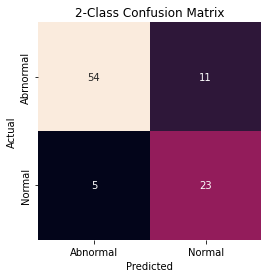

In [43]:
#ploting the confusion matrix
plt.figure(figsize=(4,4))
sns.heatmap(cm_2c,annot=True,fmt='g',cbar=False)
plt.xticks(np.arange(2)+0.5,['Abnormal','Normal'])
plt.yticks(np.arange(2)+0.5,['Abrnormal','Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('2-Class Confusion Matrix')
plt.show()

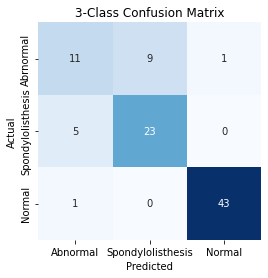

In [48]:
plt.figure(figsize=(4,4))
sns.heatmap(cm_3c,annot=True,fmt='g',cbar=False,vmin=0,cmap='Blues')
plt.xticks(np.arange(3)+0.5,['Abnormal','Spondylolisthesis','Normal'])
plt.yticks(np.arange(3)+0.5,['Abrnormal','Spondylolisthesis','Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('3-Class Confusion Matrix')
plt.show()


In [46]:
y_3c.unique()

array(['Hernia', 'Spondylolisthesis', 'Normal'], dtype=object)